In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [2]:
df=pd.read_csv('/content/heart_disease_data.csv')

In [3]:
df.shape

(303, 14)

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
print("Shape ",df.shape)
print("NUmber of Columns ",df.shape[0])
print("Number oF Rows ",df.shape[1])

Shape  (303, 14)
NUmber of Columns  303
Number oF Rows  14


In [9]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [10]:
print(dict(df['target'].value_counts()))
print(dict(df['sex'].value_counts()))

print(dict(df['age'].value_counts()))

{1: 165, 0: 138}
{1: 207, 0: 96}
{58: 19, 57: 17, 54: 16, 59: 14, 52: 13, 51: 12, 62: 11, 60: 11, 44: 11, 56: 11, 64: 10, 41: 10, 63: 9, 67: 9, 65: 8, 43: 8, 45: 8, 55: 8, 42: 8, 61: 8, 53: 8, 46: 7, 48: 7, 66: 7, 50: 7, 49: 5, 47: 5, 70: 4, 39: 4, 35: 4, 68: 4, 38: 3, 71: 3, 40: 3, 69: 3, 34: 2, 37: 2, 29: 1, 74: 1, 76: 1, 77: 1}


In [11]:
figure_size = (5,20)
figure_dpi = 100
n_rows = 3
n_columns = 1

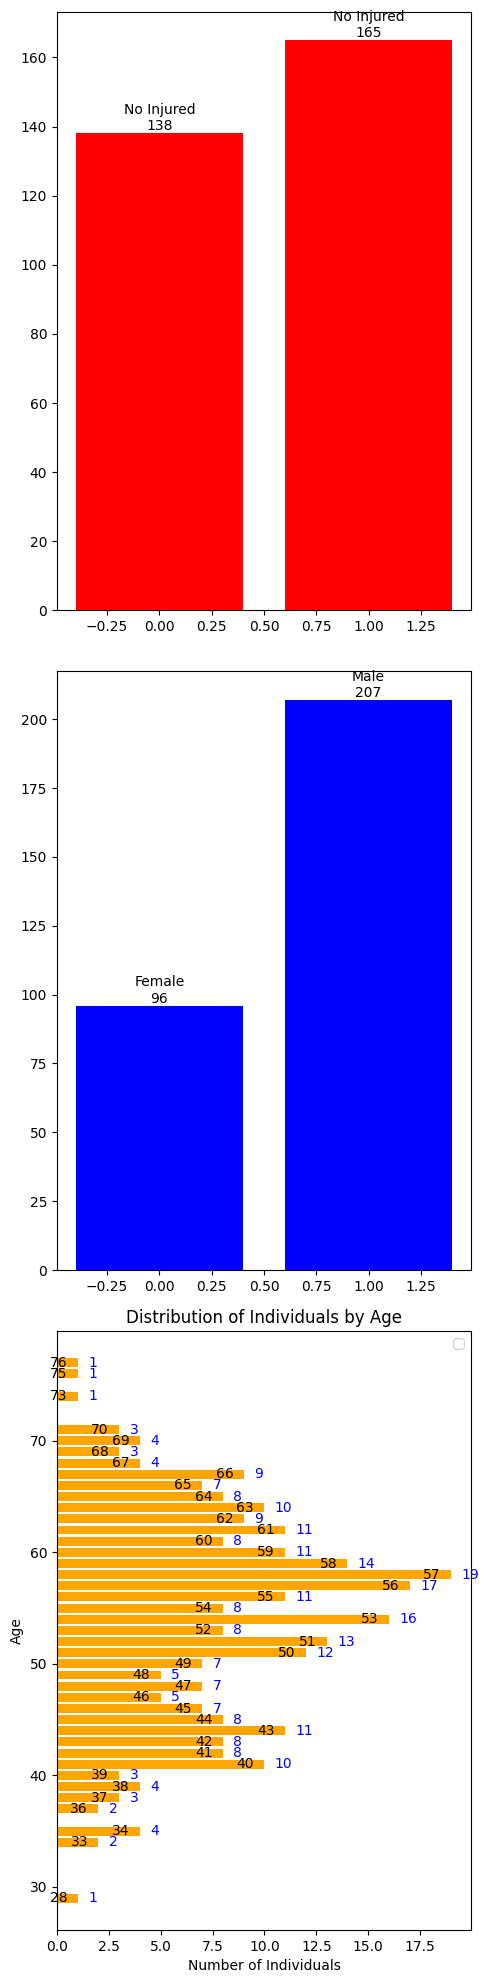

In [12]:


fig = plt.figure(figsize= figure_size, dpi = figure_dpi)

ax1 = fig.add_subplot(n_rows, n_columns,1)
ax2 = fig.add_subplot(n_rows, n_columns,2)
ax3= fig.add_subplot(n_rows, n_columns,3)

target_counts = dict(df['target'].value_counts())
sex_counts = dict(df['sex'].value_counts())
age_counts= dict(df['age'].value_counts())
sorted_ages = sorted(age_counts.keys())
sorted_counts = [age_counts[age] for age in sorted_ages]

bars1 = ax1.bar(target_counts.keys(), target_counts.values(), color="red")
for bar in bars1:
        yval = bar.get_height()
        label = 'Injured' if bar.get_x() == 1 else 'No Injured'
        ax1.text(bar.get_x() + bar.get_width()/2, yval, f"{label}\n{int(yval)}", ha='center', va='bottom')

bars2 = ax2.bar(sex_counts.keys(), sex_counts.values(), color="blue")
for i, barr in enumerate(bars2):
    val = barr.get_height()
    key = list(sex_counts.keys())[i]
    labe = 'Male' if key == 1 else 'Female'
    ax2.text(barr.get_x() + barr.get_width()/2, val, f"{labe}\n{int(val)}", ha='center', va='bottom')

bars3=ax3.barh(sorted_ages, sorted_counts, color='orange')
for bar in bars3:
    plt.text(bar.get_width() + 0.5,
             bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}',  va='center', color='blue')
for bar in bars3:
    plt.text(bar.get_width() - 0.5,
     bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_y())}',
             va='center', ha='right', color='black')
plt.xlabel('Number of Individuals')
plt.ylabel('Age')
plt.title('Distribution of Individuals by Age')

plt.legend()
plt.tight_layout()
plt.show()

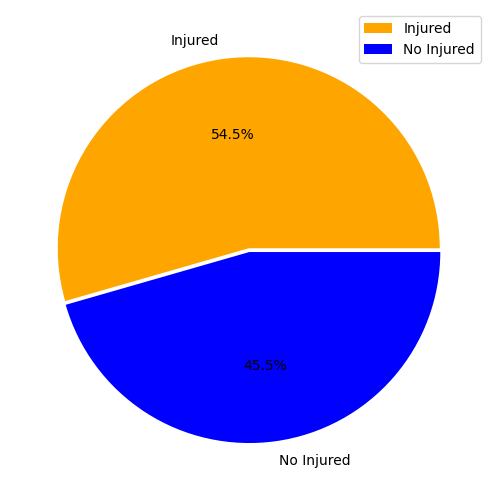

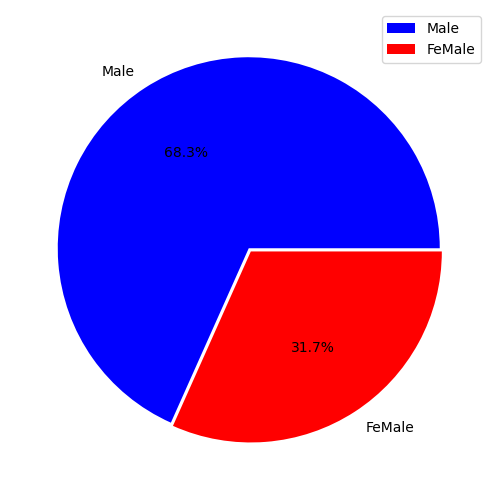

In [19]:
figure_size = (10,10)
n_rows = 2
n_columns = 1
fig = plt.figure(figsize= figure_size, dpi = figure_dpi) # add this line
ax1 = fig.add_subplot(n_rows, n_columns, 1)
ax1.pie(list(target_counts.values()), labels=['Injured','No Injured'], autopct='%1.1f%%',colors=['orange','blue'],explode=(0,0.020))
ax1.legend()
plt.tight_layout()
plt.show()

fig = plt.figure(figsize= figure_size, dpi = figure_dpi) # add this line
ax2 = fig.add_subplot(n_rows, n_columns, 2)
ax2.pie(list(sex_counts.values()), labels=['Male','FeMale'], autopct='%1.1f%%',colors=['blue','red'],explode=(0,0.020))
ax2.legend()


plt.tight_layout()
plt.show()


In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


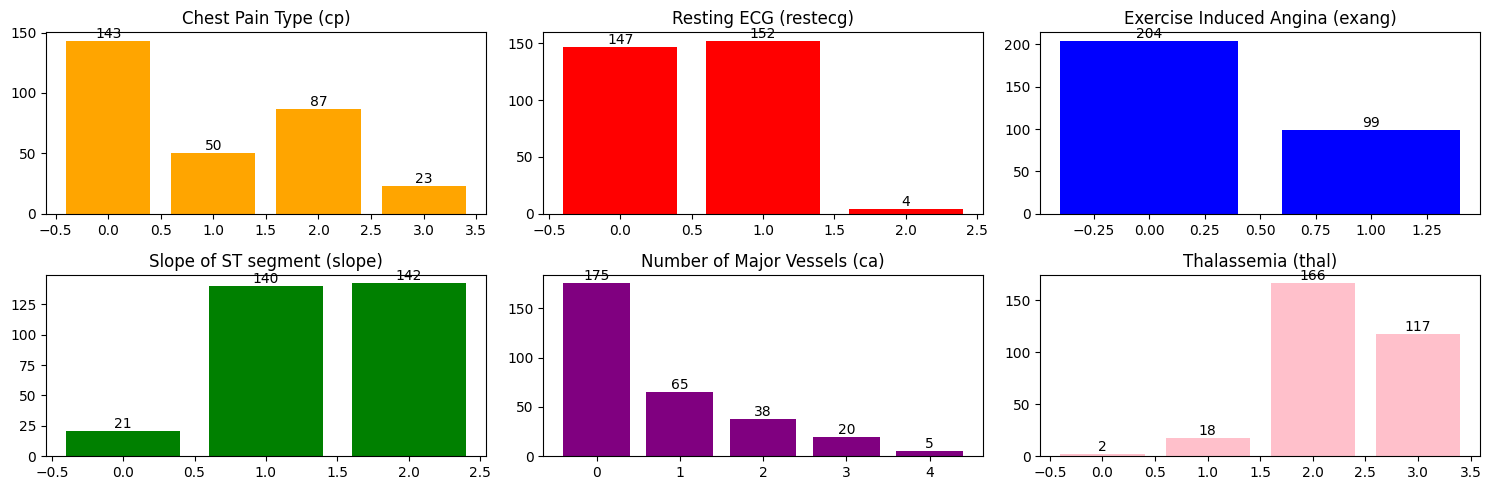

In [40]:
import matplotlib.pyplot as plt

# إعداد الشكل
figure_size = (15, 5)
fig = plt.figure(figsize=figure_size, dpi=100)

n_rows = 2
n_columns = 3

# تعريف المحاور
ax1 = fig.add_subplot(n_rows, n_columns, 1)
ax2 = fig.add_subplot(n_rows, n_columns, 2)
ax3 = fig.add_subplot(n_rows, n_columns, 3)
ax4 = fig.add_subplot(n_rows, n_columns, 4)
ax5 = fig.add_subplot(n_rows, n_columns, 5)
ax6 = fig.add_subplot(n_rows, n_columns, 6)

# رسم المخطط الأول
cp_counts = dict(df['cp'].value_counts())
bars1 = ax1.bar(cp_counts.keys(), cp_counts.values(), color="orange")
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, f"{int(yval)}", ha='center', va='bottom')
ax1.set_title("Chest Pain Type (cp)")

# رسم المخطط الثاني
restecg_counts = dict(df['restecg'].value_counts())
bars2 = ax2.bar(restecg_counts.keys(), restecg_counts.values(), color="red")
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval, f"{int(yval)}", ha='center', va='bottom')
ax2.set_title("Resting ECG (restecg)")

# رسم المخطط الثالث
exang_counts = dict(df['exang'].value_counts())
bars3 = ax3.bar(exang_counts.keys(), exang_counts.values(), color="blue")
for bar in bars3:
    yval = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2, yval, f"{int(yval)}", ha='center', va='bottom')
ax3.set_title("Exercise Induced Angina (exang)")

# رسم المخطط الرابع
slope_counts = dict(df['slope'].value_counts())
bars4 = ax4.bar(slope_counts.keys(), slope_counts.values(), color="green")
for bar in bars4:
    yval = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2, yval, f"{int(yval)}", ha='center', va='bottom')
ax4.set_title("Slope of ST segment (slope)")

# رسم المخطط الخامس
ca_counts = dict(df['ca'].value_counts())
bars5 = ax5.bar(ca_counts.keys(), ca_counts.values(), color="purple")
for bar in bars5:
    yval = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2, yval, f"{int(yval)}", ha='center', va='bottom')
ax5.set_title("Number of Major Vessels (ca)")

# رسم المخطط السادس
thal_counts = dict(df['thal'].value_counts())
bars6 = ax6.bar(thal_counts.keys(), thal_counts.values(), color="pink")
for bar in bars6:
    yval = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2, yval, f"{int(yval)}", ha='center', va='bottom')
ax6.set_title("Thalassemia (thal)")

# تحسين العرض
plt.tight_layout()

# عرض المخططات
plt.show()


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [41]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [46]:
X=df.drop(columns=['target'],axis=1)
Y=df['target']

In [44]:
x


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [45]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [73]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [74]:
print("X_test",X_test.shape)
print("X_train",X_train.shape)
print("Y_test",Y_test.shape)
print("Y_train",Y_train.shape)

X_test (61, 13)
X_train (242, 13)
Y_test (61,)
Y_train (242,)


In [75]:
linearRegressionModel = LinearRegression()
linearRegressionModel.fit(X_train,Y_train)

LinearRegression()

In [76]:
y_predicted=linearRegressionModel.predict(X_test)

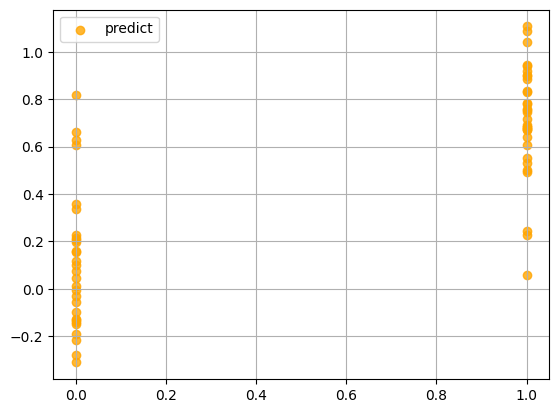

In [77]:
plt.scatter(Y_test, y_predicted,
            color="Orange", label="predict", alpha=0.80)
plt.legend()
plt.grid(True)
plt.show()


In [78]:
print('Mean_squared_error',mean_squared_error(y_true=Y_test, y_pred=y_predicted))
print('Mean_absolute_error',metrics.mean_absolute_error(y_true=Y_test, y_pred=y_predicted))

Mean_squared_error 0.11627071992880016
Mean_absolute_error 0.26683680169007956


In [79]:
def predict_pationt_data_price(pationt_data):
    data = pd.DataFrame([pationt_data], columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs','restecg', 'thalach','exang','oldpeak'	,'slope','ca','thal'])
    predicted_price = linearRegressionModel.predict(data)

    return predicted_price[0]

In [80]:
pationt_data={
              'age':25
              , 'sex':1
              , 'cp':2
              , 'trestbps':175,
              'chol':240,
              'fbs':1,
              'restecg':0,
              'thalach':200,
              'exang':1,
              'oldpeak':2,
              'slope':1,
              'ca':1,
              'thal':1
}

In [81]:
predicted = predict_pationt_data_price(pationt_data)
threshold = 0.5
if predicted > threshold:
    result ="have heart disease"
else:
    result ="Not have heart disease"
print(f"Heart Disease Prediction : {result,predicted} ")

Heart Disease Prediction : ('have heart disease', 0.5309541398377958) 


In [82]:
pationt_data={
              'age':85
              , 'sex':0
              , 'cp':1
              , 'trestbps':105,
              'chol':210,
              'fbs':2,
              'restecg':1,
              'thalach':350,
              'exang':5,
              'oldpeak':1,
              'slope':0,
              'ca':3,
              'thal':2
}

In [83]:
predicted = predict_pationt_data_price(pationt_data)
threshold = 0.5
if predicted > threshold:
    result ="have heart disease"
else:
    result ="Not have heart disease"
print(f"Heart Disease Prediction : {result,predicted} ")

Heart Disease Prediction : ('Not have heart disease', 0.0956687076327769) 


In [85]:
dict_models = {
    'Logistic Regression': LogisticRegression(),
    'K-NN': KNeighborsClassifier(n_neighbors = 3),
    'Decision Tree':  DecisionTreeClassifier(random_state=10),
    'Random Forest': RandomForestClassifier(n_estimators=60, random_state=0),
    'SVM': SVC(kernel="linear")

}
dict_models

{'Logistic Regression': LogisticRegression(),
 'K-NN': KNeighborsClassifier(n_neighbors=3),
 'Decision Tree': DecisionTreeClassifier(random_state=10),
 'Random Forest': RandomForestClassifier(n_estimators=60, random_state=0),
 'SVM': SVC(kernel='linear')}

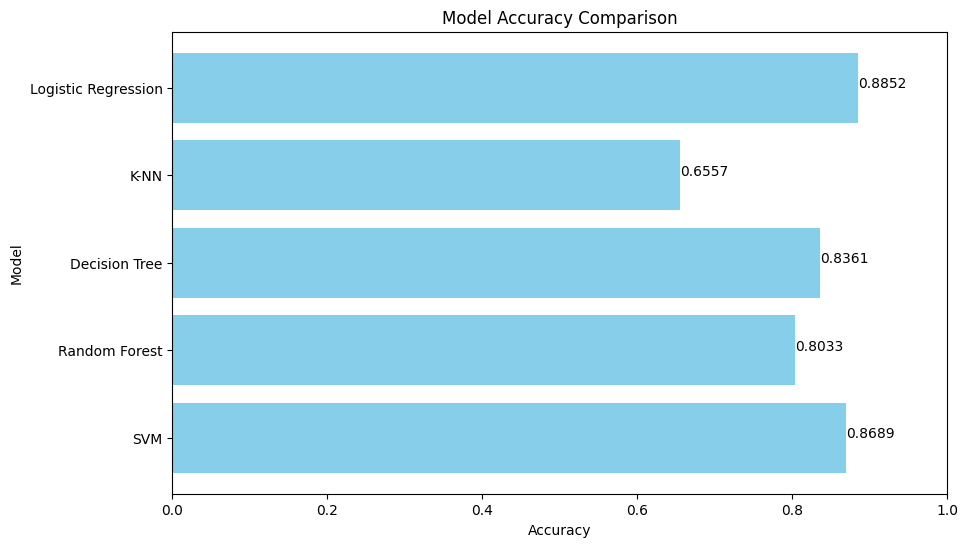

In [89]:
import matplotlib.pyplot as plt

# إعداد الأسماء والقيم للرسم
model_names = list(dict_accuracy.keys())
accuracies = list(dict_accuracy.values())

# إنشاء مخطط شريطي
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)  # تحديد مجال المحور x بين 0 و 1
plt.gca().invert_yaxis()  # لجعل النموذج ذو الدقة الأعلى في الأعلى

# عرض القيم على الأعمدة
for index, value in enumerate(accuracies):
    plt.text(value, index, f"{value:.4f}")

# عرض المخطط
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.8852
F1-Score: 0.8851
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

Confusion Matrix:
[[25  4]
 [ 3 29]]
--------------------------------------------------
Model: K-NN
Accuracy: 0.6557
F1-Score: 0.6557
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.69      0.66        29
           1       0.69      0.62      0.66        32

    accuracy                           0.66        61
   macro avg       0.66      0.66      0.66        61
weighted avg       0.66      0.66      0.66        61

Confusion Matrix:
[[20  9]
 [12 20]]
--------------------------------------------------
Model: Decision T

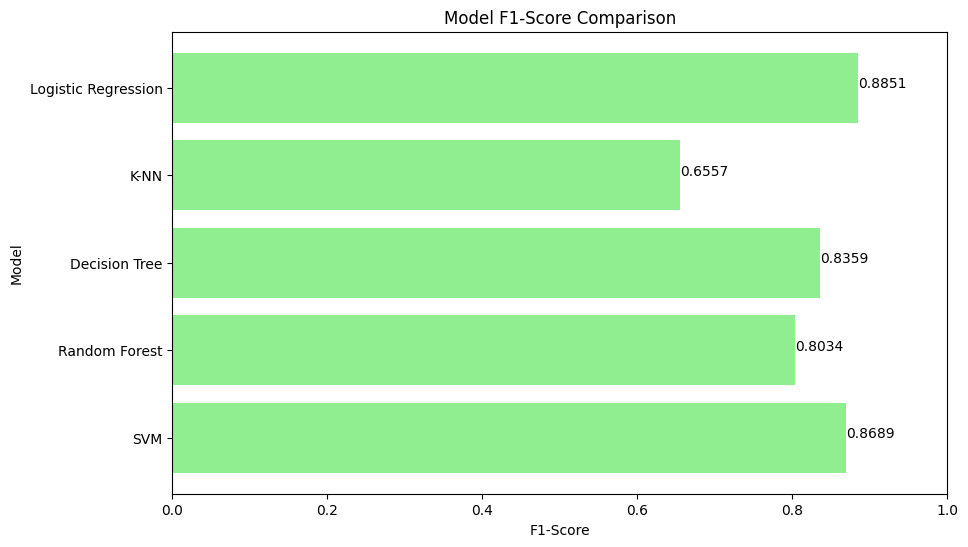

In [93]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt

# افتراض أن X هي الميزات المدخلة و y هو الهدف (التصنيف) من البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# قاموس لتخزين دقة و F1-Score كل نموذج
dict_accuracy = {}
dict_f1_score = {}

# تدريب كل نموذج وتقييم الأداء
for model_name, model in dict_models.items():
    # تدريب النموذج
    model.fit(X_train, y_train)

    # التنبؤ باستخدام النموذج المدرب
    y_pred = model.predict(X_test)

    # حساب الدقة
    accuracy = accuracy_score(y_test, y_pred)
    dict_accuracy[model_name] = accuracy

    # حساب F1-Score
    f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' لأخذ متوسط مرجح للفئات
    dict_f1_score[model_name] = f1

    # عرض التقرير لكل نموذج
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)

# عرض F1-Score لجميع النماذج في رسم بياني
model_names = list(dict_f1_score.keys())
f1_scores = list(dict_f1_score.values())

plt.figure(figsize=(10, 6))
plt.barh(model_names, f1_scores, color='lightgreen')
plt.xlabel('F1-Score')
plt.ylabel('Model')
plt.title('Model F1-Score Comparison')
plt.xlim(0, 1)
plt.gca().invert_yaxis()  # لجعل النموذج ذو الـ F1-Score الأعلى في الأعلى

# عرض القيم على الأعمدة
for index, value in enumerate(f1_scores):
    plt.text(value, index, f"{value:.4f}")

plt.show()
